In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
df.isnull().any()

v1            False
v2            False
Unnamed: 2     True
Unnamed: 3     True
Unnamed: 4     True
dtype: bool

## Data Preprocessing 

In [7]:
df.rename(columns = {'v1' : 'output', 'v2' : 'sms'}, inplace=True)
df.sample()

,output,sms,Unnamed: 2,Unnamed: 3,Unnamed: 4
2088,spam,Well done ENGLAND! Get the official poly ringt...,NaN,NaN,NaN


In [8]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [9]:
df.sample()

,output,sms
3995,ham,We'll you pay over like &lt;#&gt; yrs so its ...


In [10]:
df.duplicated().sum()

403

In [11]:
df.drop_duplicates(keep='first', inplace=True)
df.shape

(5169, 2)

In [12]:
df.isna().sum()

output    0
sms       0
dtype: int64

## Text Preprocessing 

In [13]:
df['lenght'] = df['sms'].apply(len)
df.sample()

,output,sms,lenght
2306,ham,"Aight that'll work, thanks",26


In [14]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [15]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

df['tokens'] = df['sms'].apply(word_tokenize)

stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [item for item in x if item.lower() not in stop_words])

df['tokens'] = df['tokens'].apply(lambda x: ' '.join(x))

df['tokens'] = df['tokens'].apply(lambda x: x.lower())

# Sample the DataFrame
df.sample()

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


,output,sms,lenght,tokens
476,ham,Love you aathi..love u lot..,28,love aathi .. love u lot ..


In [16]:
import string

def text_process(sms):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Convert to lower case
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in sms if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    # Convert text into lower case
    nopunc = nopunc.lower()
    # Convert text into list of words/tokens
    tokens = nopunc.split()
    return tokens

In [17]:
df['tokens'] = df['tokens'].apply(text_process)
df['sms'] = df['tokens'].apply(lambda x: ' '.join(x))
df.sample()

,output,sms,lenght,tokens
3542,ham,m e person s e sms survey,40,"[m, e, person, s, e, sms, survey]"


In [18]:
df = df.drop('tokens', axis=1)

## Data Visualizations 

Text(0, 0.5, '')

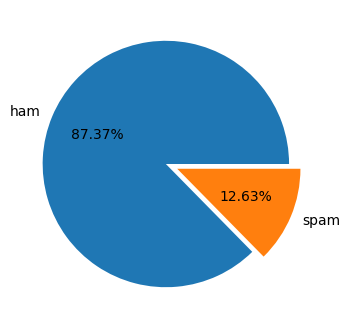

In [19]:
plt.figure(figsize=(6, 4))
df['output'].value_counts().plot(kind='pie', autopct="%1.2f%%", explode=(0, 0.1))
plt.ylabel("")

Text(0.5, 1.0, 'Message Length Distribution')

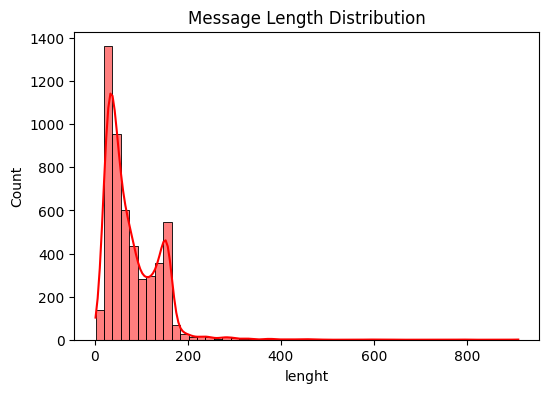

In [20]:
# message length distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['lenght'], bins=50, kde=True, color='red')
plt.title('Message Length Distribution')

Text(0.5, 1.0, 'Spam Message Length Distribution')

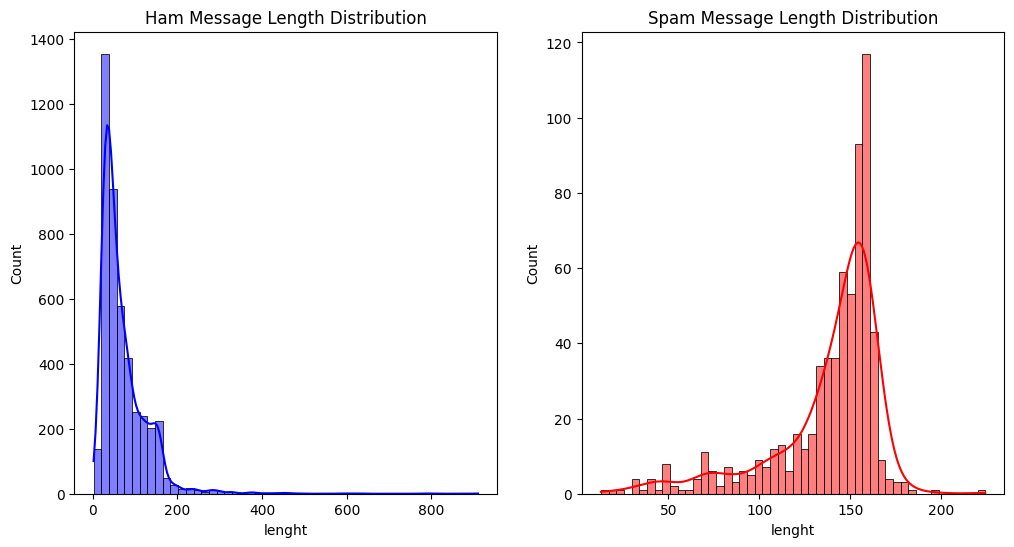

In [21]:
# message length distribution by label
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[df['output']=='ham']['lenght'], bins=50, kde=True, color='blue')
plt.title('Ham Message Length Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df[df['output']=='spam']['lenght'], bins=50, kde=True, color='red')
plt.title('Spam Message Length Distribution')

[]

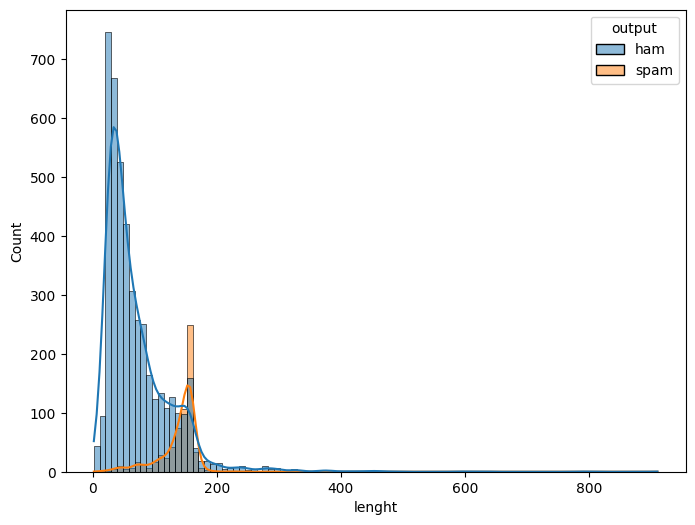

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df,x='lenght',hue='output',kde=True)
plt.plot()

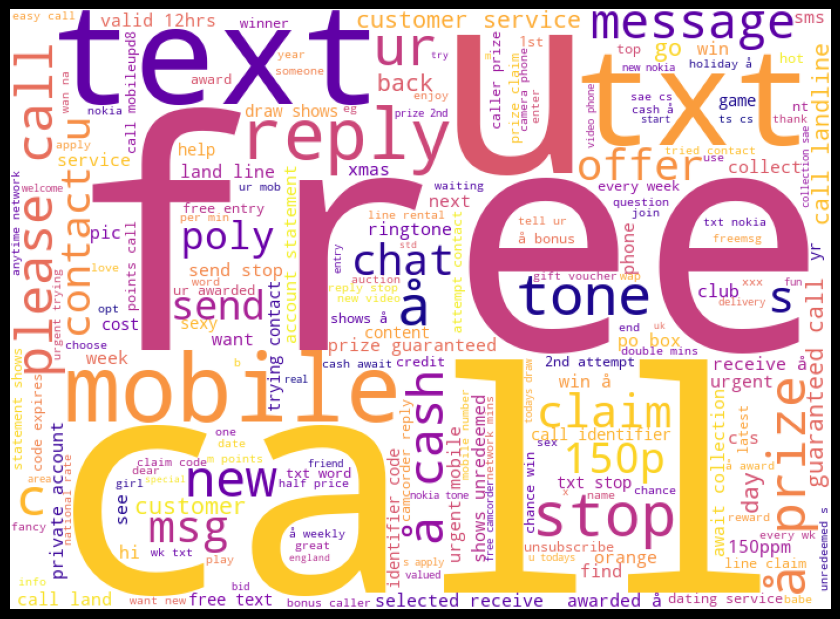

In [23]:
from wordcloud import WordCloud

# word cloud for spam messages
spam_words = ' '.join(list(df[df['output']=='spam']['sms']))
spam_wc = WordCloud(width=700, height=512, colormap="plasma", background_color="white").generate(spam_words)
plt.figure(figsize=(12, 6), facecolor='k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)

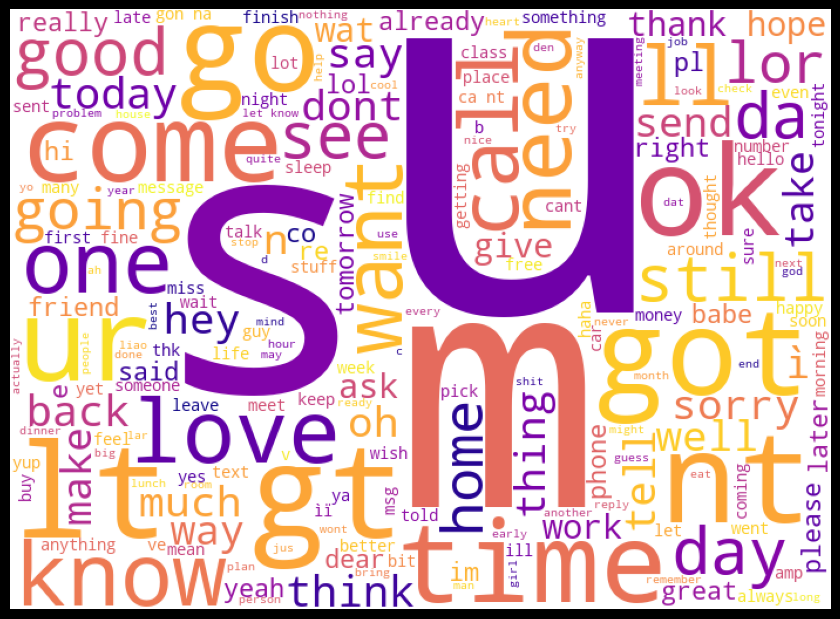

In [24]:
# word cloud for spam messages
spam_words = ' '.join(list(df[df['output']=='ham']['sms']))
spam_wc = WordCloud(width=700, height=512, colormap="plasma", background_color="white").generate(spam_words)
plt.figure(figsize=(12, 6), facecolor='k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)

## Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['output'] = le.fit_transform(df['output'])
df.sample()

,output,sms,lenght
4764,0,text way cup stop work bus,76


In [26]:
le.classes_

array(['ham', 'spam'], dtype=object)

## Model Training 

In [27]:
X = df['sms']
y = df['output']

In [28]:
# Vectorization 
from sklearn.feature_extraction.text  import TfidfVectorizer

tfdf = TfidfVectorizer()
X = tfdf.fit_transform(X)
print(X)

  (0, 3661)	0.15666586078738673
  (0, 4485)	0.3454275515944115
  (0, 6086)	0.26954017519707396
  (0, 2416)	0.2668495638089761
  (0, 1378)	0.26433266494390156
  (0, 1825)	0.29136429382740486
  (0, 3748)	0.1932568725875269
  (0, 8693)	0.2439268261366239
  (0, 4617)	0.29136429382740486
  (0, 1823)	0.32961506236415117
  (0, 2140)	0.29136429382740486
  (0, 3708)	0.15987741914483158
  (0, 1148)	0.3454275515944115
  (0, 8476)	0.1932568725875269
  (1, 5672)	0.2772381569146294
  (1, 4654)	0.40686345151496484
  (1, 4454)	0.523263971403317
  (1, 8595)	0.4303784716546335
  (1, 5701)	0.5464158888057334
  (2, 3462)	0.11330973356678434
  (2, 3050)	0.352478727746354
  (2, 8650)	0.19336268880352267
  (2, 2252)	0.19336268880352267
  (2, 8609)	0.14887174406956868
  (2, 3187)	0.4725982808441671
  :	:
  (5164, 156)	0.3423119579431336
  (5164, 5582)	0.3423119579431336
  (5165, 4017)	0.36762505599701134
  (5165, 3677)	0.3629763874954083
  (5165, 3449)	0.5621149811980123
  (5165, 3081)	0.6458534727294851
  (5

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model_name = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'MultiNormial NB', 'Bernoulli NB']
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    SVC(),
    MultinomialNB(),
    BernoulliNB()
]

for name, model in zip(model_name, models):
    print(f'{name} Model:')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred)*100}%')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
    print("="*55)

Logistic Regression Model:
Accuracy Score: 93.81044487427465%
Confusion Matrix:
[[882   7]
 [ 57  88]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       889
           1       0.93      0.61      0.73       145

    accuracy                           0.94      1034
   macro avg       0.93      0.80      0.85      1034
weighted avg       0.94      0.94      0.93      1034

Decision Tree Model:
Accuracy Score: 94.87427466150871%
Confusion Matrix:
[[865  24]
 [ 29 116]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       889
           1       0.83      0.80      0.81       145

    accuracy                           0.95      1034
   macro avg       0.90      0.89      0.89      1034
weighted avg       0.95      0.95      0.95      1034

Random Forest Model:
Accuracy Score: 97.1953578336557%
Confusion Matrix:
[[888   1]
 [ 28 117]]
Clas

<b>Best Performing Model</b><br>
Based on the results, the Bernoulli Naive Bayes model performs the best, with an accuracy score of 97.10%. The Random Forest model is a close second, with an accuracy score of 97.00%. The Decision Tree model performs reasonably well, with an accuracy score of 95.55%. The Logistic Regression, SVM, and Multinomial NB models perform similarly, with accuracy scores ranging from 93.81% to 96.90%.

The Bernoulli NB model's high accuracy score and F1-score suggest that it is well-suited for this classification task. However, it is essential to consider other factors, such as model interpretability and computational complexity, when selecting the final model.
<br>

# Random Forest Classifier 

In [32]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print(y_pred_rfc)

[0 0 0 ... 1 0 0]


### Test New Data 

In [33]:
# testing the model with new data (spam message)
new_data = ['Congratulations! you have won a lottery. To claim your prize, please click on the link below']
new_data = tfdf.transform(new_data)
pred = rfc.predict(new_data)[0]
if pred == 0:
    print('This is a ham message')
else:
    print('This is a spam message')

This is a spam message


In [34]:
# testing the model with new data (ham message)
new_data = ['Hi John, can we reschedule our meeting to next Tuesday at 3 PM? Let me know if that works for you.']
new_data = tfdf.transform(new_data)
pred = rfc.predict(new_data)[0]
if pred == 0:
    print('This is a ham message')
else:
    print('This is a spam message')

This is a ham message


# Support Vector Classifier

In [35]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print(y_pred_svm)

[0 0 0 ... 1 0 0]


### Test New Data

In [36]:
# testing the model with new data (spam message)
new_data = ['Congratulations! you have won a lottery. To claim your prize, please click on the link below']
new_data = tfdf.transform(new_data)
pred = svm.predict(new_data)[0]
if pred == 0:
    print('This is a ham message')
else:
    print('This is a spam message')

This is a spam message


In [37]:
# testing the model with new data (ham message)
new_data = ['Hi John, can we reschedule our meeting to next Tuesday at 3 PM? Let me know if that works for you.']
new_data = tfdf.transform(new_data)
pred = svm.predict(new_data)[0]
if pred == 0:
    print('This is a ham message')
else:
    print('This is a spam message')

This is a ham message


# Bernoulli Navie Classifier

In [38]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_svm = bnb.predict(X_test)
print(y_pred_svm)

[0 1 0 ... 1 0 0]


### Test New Data

In [39]:
# testing the model with new data (spam message)
new_data = ['Congratulations! you have won a lottery. To claim your prize, please click on the link below']
new_data = tfdf.transform(new_data)
pred = bnb.predict(new_data)[0]
if pred == 0:
    print('This is a ham message')
else:
    print('This is a spam message')

This is a spam message


In [40]:
# testing the model with new data (ham message)
new_data = ['Hi John, can we reschedule our meeting to next Tuesday at 3 PM? Let me know if that works for you.']
new_data = tfdf.transform(new_data)
pred = bnb.predict(new_data)[0]
if pred == 0:
    print('This is a ham message')
else:
    print('This is a spam message')

This is a ham message


In [41]:
# Test on New Dataset 

In [42]:
import openpyxl
tdf = pd.read_excel("smsdata.xlsx")
print(f"shape of test data : {tdf.shape}")
tdf.sample()

shape of test data : (8, 2)


,output,sms
7,ham,Have you got Xmas radio times. If not i will g...


In [43]:
tdf['output'] = le.fit_transform(tdf['output'])

In [44]:
Xt = tdf['sms']
yt = tdf['output']

In [45]:
Xt = tfdf.transform(Xt)

### Bernoulli Navie Classifier

In [46]:
# using Bernoulli Navie Classifier
y_bnb = bnb.predict(Xt)
print(y_bnb)

[0 0 1 1 0 0 1 0]


In [47]:
print(accuracy_score(y_true=yt, y_pred=y_bnb))

0.875


### Random Forest Classifier

In [48]:
# using Random Forest 
y_rfc = rfc.predict(Xt)
print(y_rfc)

[0 0 1 1 0 1 1 0]


In [49]:
print(accuracy_score(y_true=yt, y_pred=y_rfc))

1.0


### Support Vector Classifier 

In [50]:
# using Support Vector Classifier 
y_svm = svm.predict(Xt)
print(y_svm)

[0 0 0 1 0 0 1 0]


In [51]:
print(accuracy_score(y_true=yt, y_pred=y_svm))

0.75


# Conclusion 
<b> Best Fit Model is Bernoulli Navie Classifier and Random Forest Classifier </b>